# Ev.5:- Census Income Project

In [1]:
# For importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file.
data=pd.read_csv("census_income.csv")

In [3]:
# .head used for fetching first five rows 
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EXPLORATORY DATA ANALYSIS (EDA):-

In [4]:
# For checking how many rows and columns are there in dataset
data.shape

(32560, 15)

In [5]:
# Foer checking the available columns in the dataset.
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
# For checking the Null values in the dataset.
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here, as seen above there are no null values present in the dataset.

In [7]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# For checking the datatypes of each columns:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here, the Target column is Income and in this, Relationship and Race columns are not required for proceeding with model buikding process.

In [9]:
# For checking the unique values in the dataset:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Here, as seen above, there are 21647 unique values present in column named: Fnlwgt and 
    it is better to remove this column as it might affect model performance.

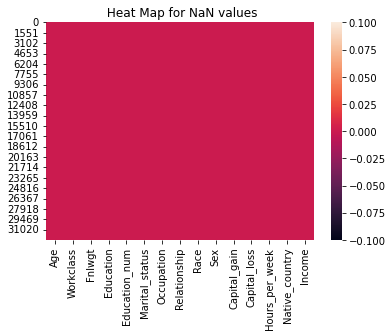

In [10]:
# For visualizing null values using heatmap method
sns.heatmap(data.isnull())
plt.title(" Heat Map for NaN values")
plt.show()

No Null values present in the dataset

In [11]:
# For checking unique values present in Target column:
data["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
# For Checking valuecounts of the whole dataset to observe what kind of data are present in all the columns:
for i in data.columns:
    print(data[i].value_counts())
    print("------")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: E

In [13]:
# For changing the " ? " using mode value to all the three columns which are Categorical/ Object Columns:-
data["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

Here, it is showing 'Private'

In [14]:
# For Saving mode value in place of ?
data["Workclass"]= data.Workclass.str.replace("?","Private")

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\1906134017.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Workclass"]= data.Workclass.str.replace("?","Private")


In [15]:
# For changing the " ? " using mode value to the columns which are Categorical/ Object dtype Columns:
data["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [16]:
# For Saving mode value in place of ?
data["Occupation"]= data.Occupation.str.replace("?","Pr0f-specialty")

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\69450573.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Occupation"]= data.Occupation.str.replace("?","Pr0f-specialty")


In [17]:
# For changing the ? using mode value to the columns which are Categorical/ Object dtype Columns:
data["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

In [18]:
# Saving mode value in place of ?
data["Native_country"]= data.Native_country.str.replace("?","United-States")

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\1591570997.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Native_country"]= data.Native_country.str.replace("?","United-States")


In [19]:
# For checking the values present in the column Capital_gain column:-
data["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

Here, as seen above, out of total 32560 rows, 29849 rows have value as 0,dropping it is beneficial for further model processes.

In [20]:
# For checking value counts in Capital_loss as well:-
data["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

Here, also 31041 rows have values equal to 0.

In [21]:
# For checking value counts in Fnlwgt column:-
data["Fnlwgt"].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [22]:
# For checking the Statistical summary of the dataset:-
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In this, it is seen that the presence of outliers in the columns Age and Hours_per_week and
Also it is seen  that there is some skewness present in Age column.

In [23]:
# For dropping CapitalGain and Capital Loss columns from the dataset:-
data=data.drop(["Capital_gain","Capital_loss"], axis=1)

In [24]:
# For checking whether columns has been deleted or not:-
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


As seen above, the columns has been deleted properly.

Data Visualisations:-

In [25]:
# For distributing our data into two variables i.e.category and integer:-
Category=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Category.append(i)
print(Category)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [26]:
# For distributing our data into two variables i.e.category and integer:-
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        Integer.append(i)
print(Integer)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Performing Univariate Analysis:-

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


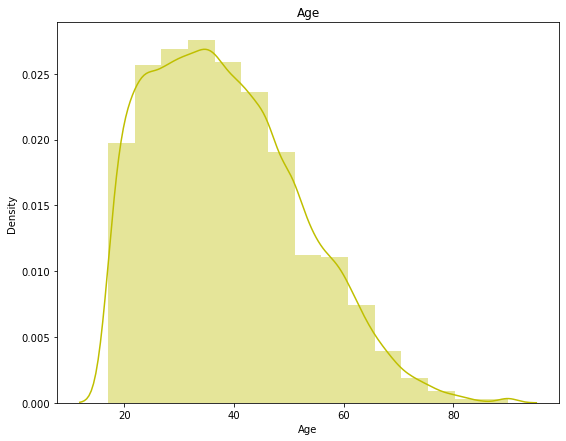

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


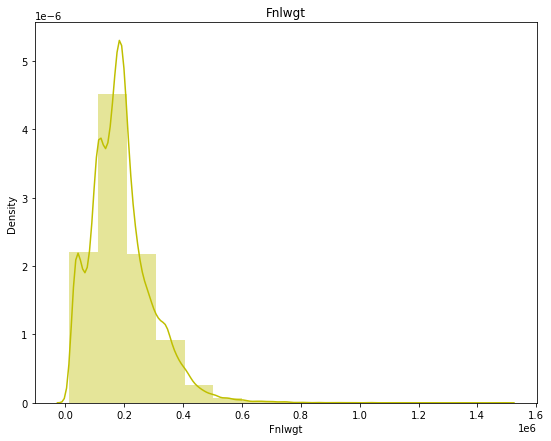

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


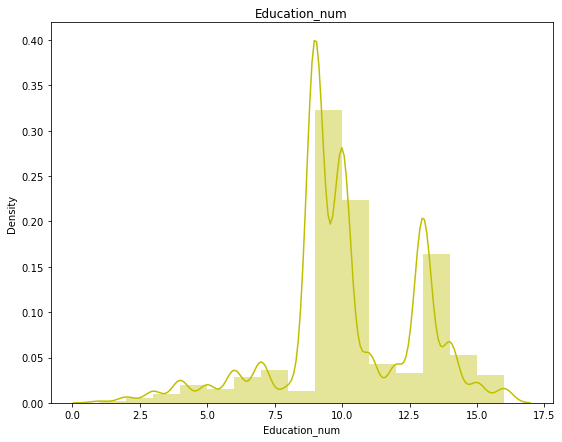

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


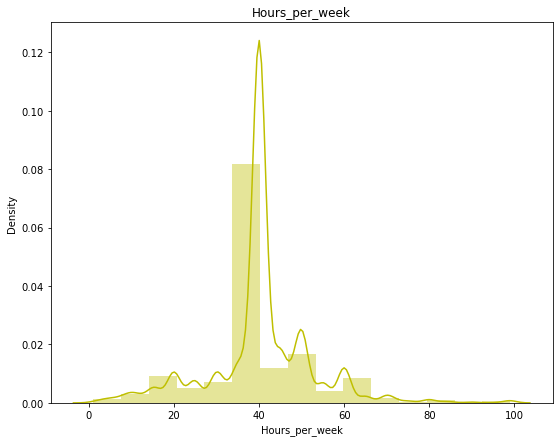

In [27]:
# For visualizing & checking all the columns using distplot method:

for i in data[Integer]:
    plt.figure(figsize=(9,7))
    sns.distplot(data[i], color="y", bins=15)
    plt.title(i)
    plt.show()

Here, the skewness is seen in the above plots.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


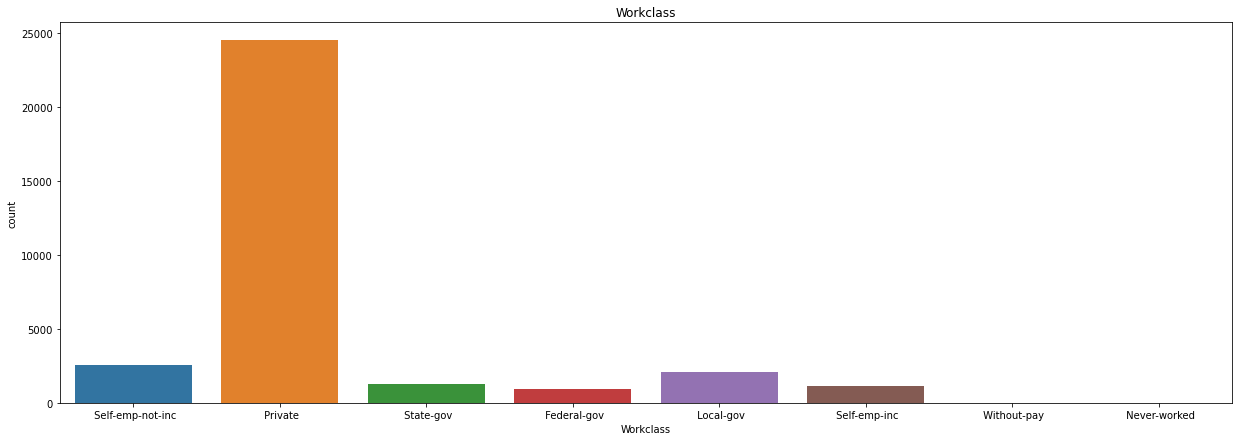

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


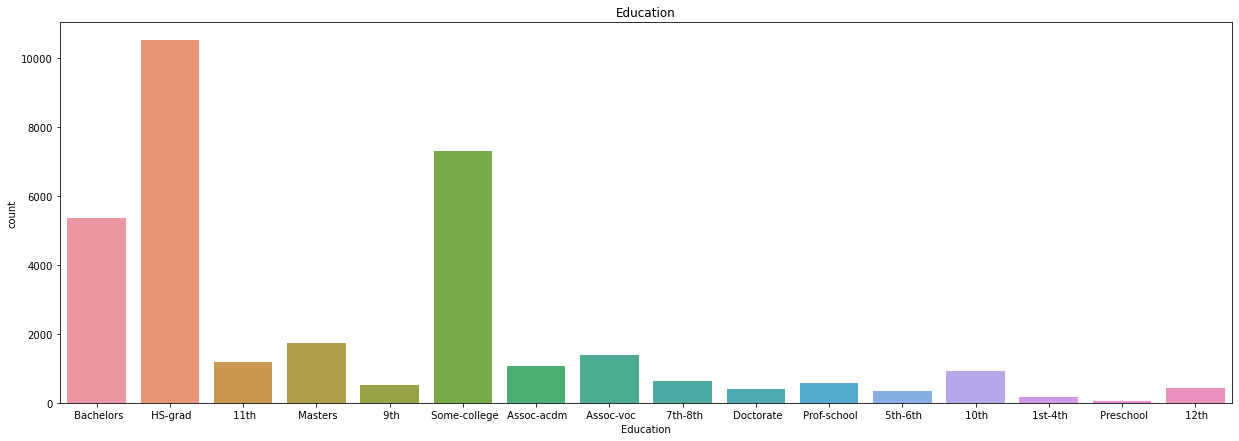

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


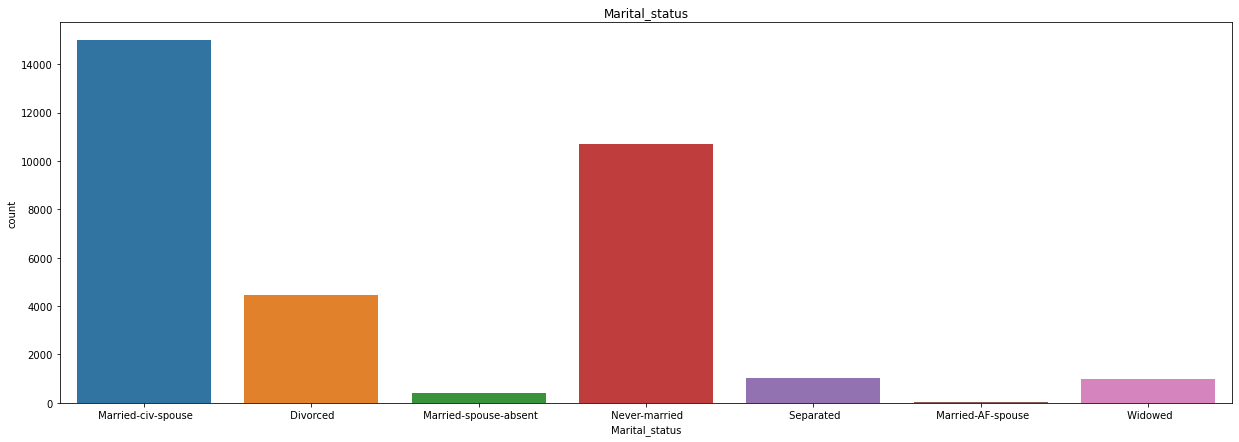

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


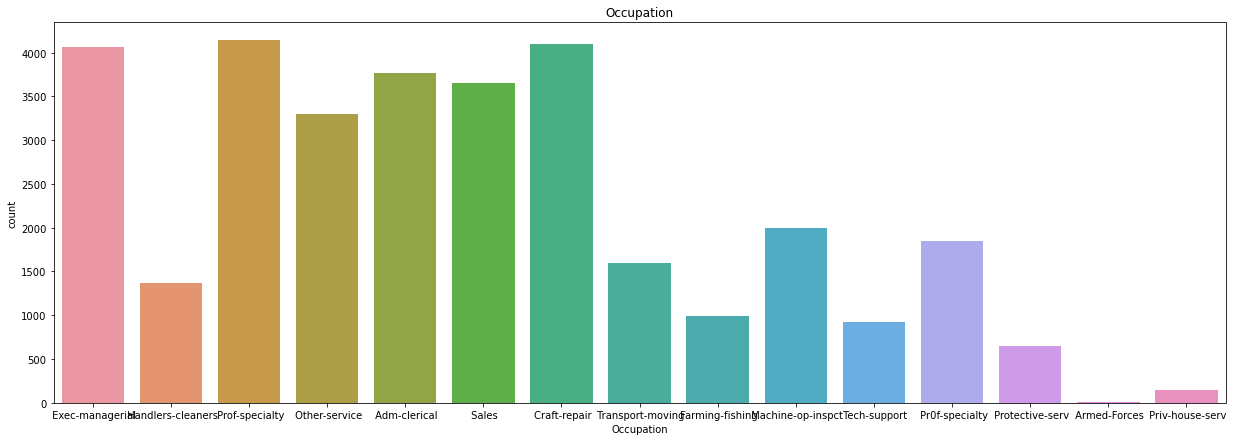

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


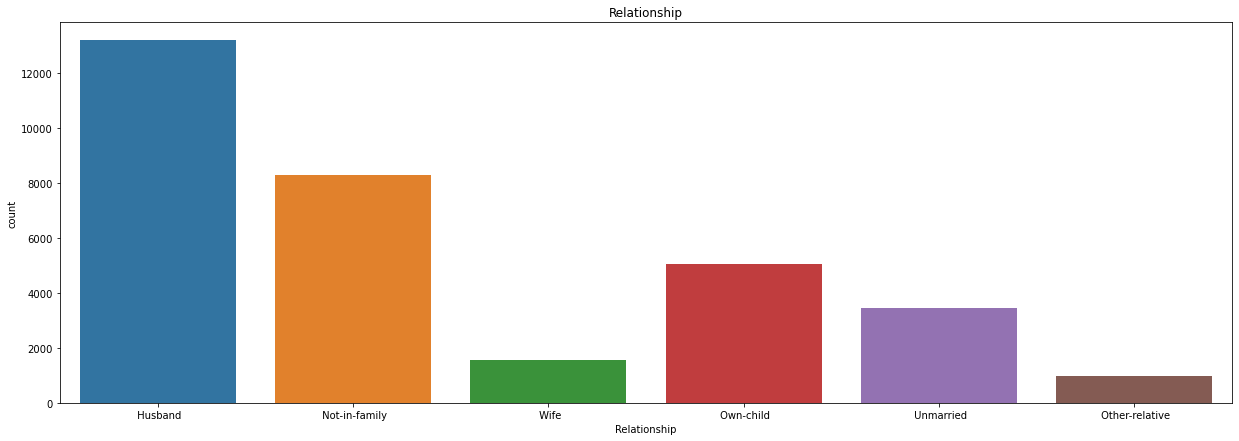

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


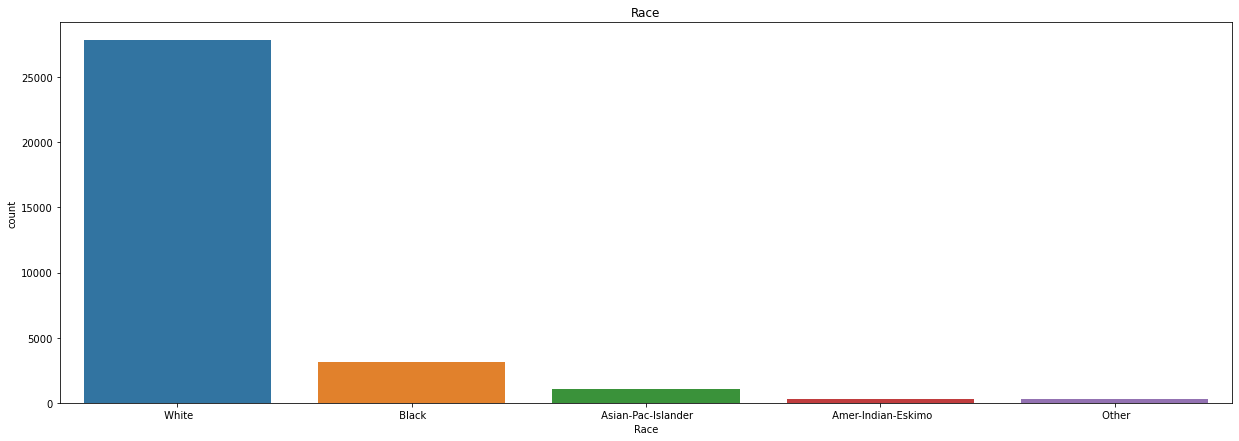

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


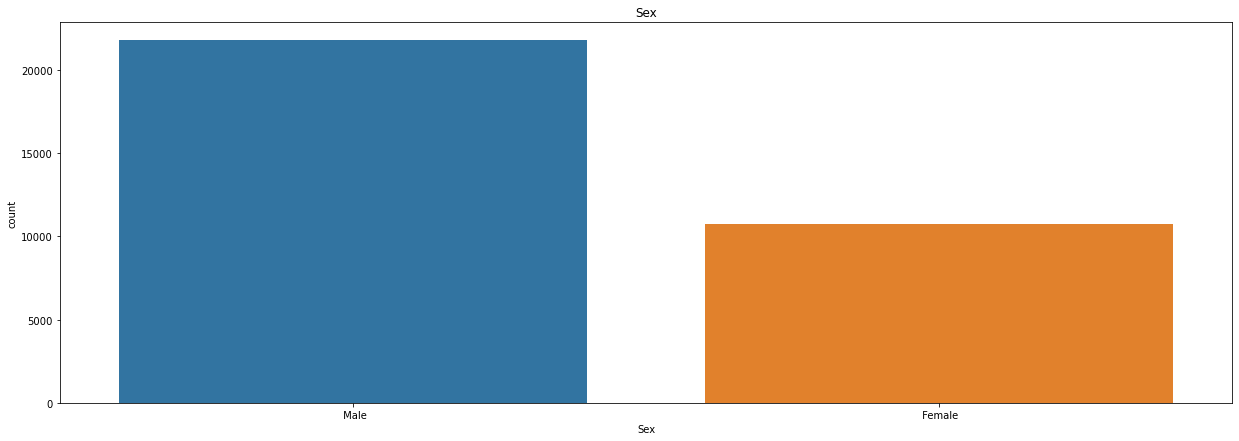

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


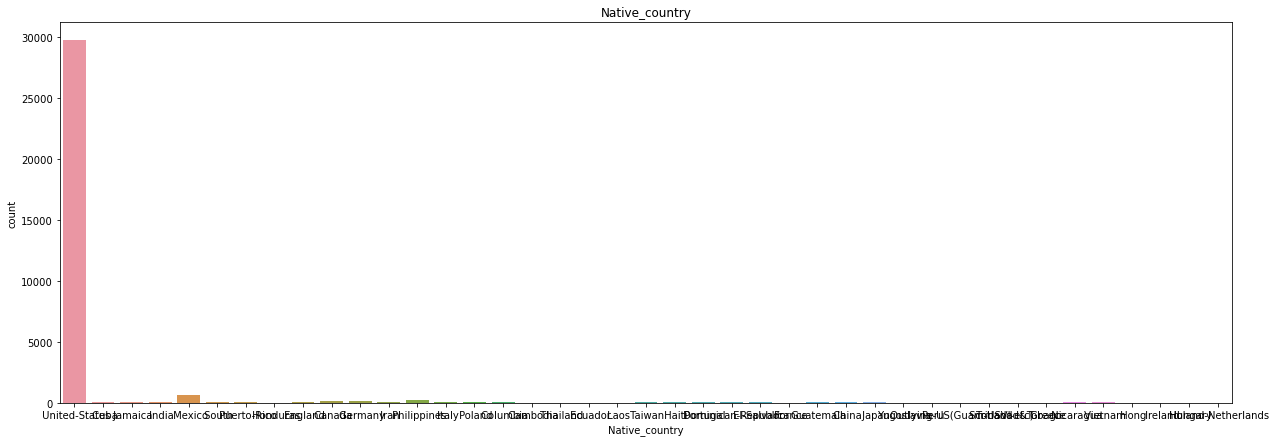

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


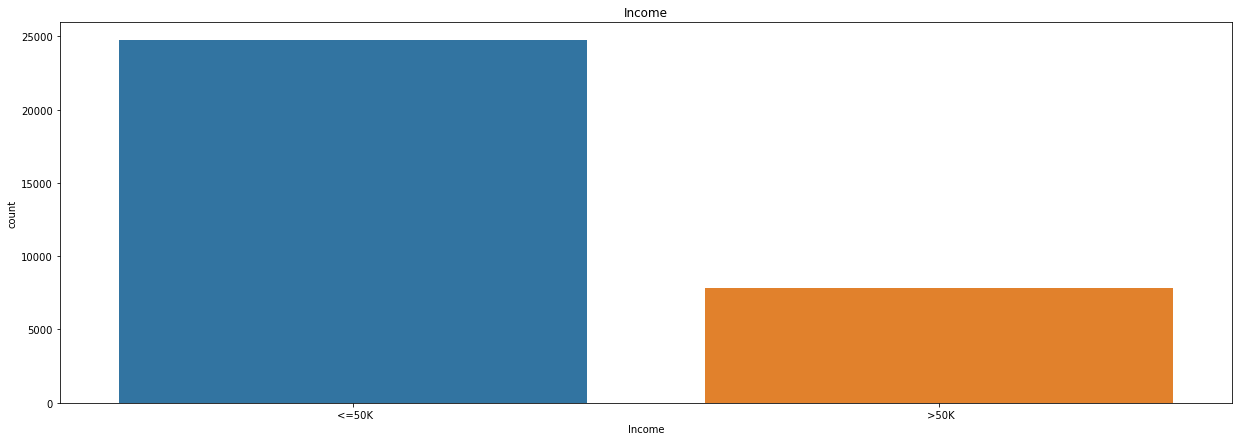

In [28]:
# For visualizing and checking columns in category using countplot:-

for i in data[Category]:
    plt.figure(figsize=(21,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

In this, Race column has maximum  white employees.
and most employees are males in column sex.
It is observed that most employees in this dataset is earning <=50k in Income column.

# BiVariate Analysis:-


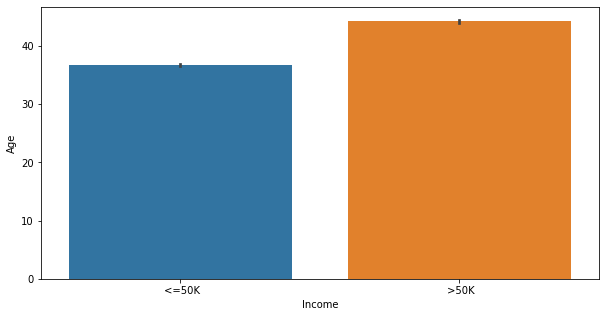

In [29]:
# For checking correlation between age and income column:

plt.figure(figsize=(10,5))
sns.barplot(x='Income',y="Age",data=data)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

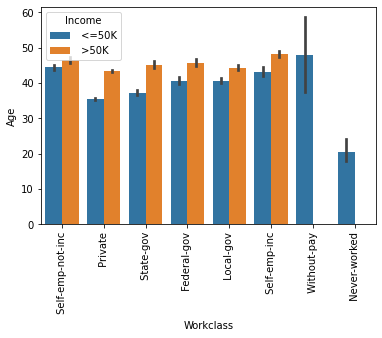

In [30]:
# For plotting  workclass and Age column:
sns.barplot(x="Workclass",y="Age", hue="Income", data=data)
plt.xticks(rotation=90)

In this, it is seen that people in each field have a chance of getting income >50k, except people who never worked or worked without pay.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

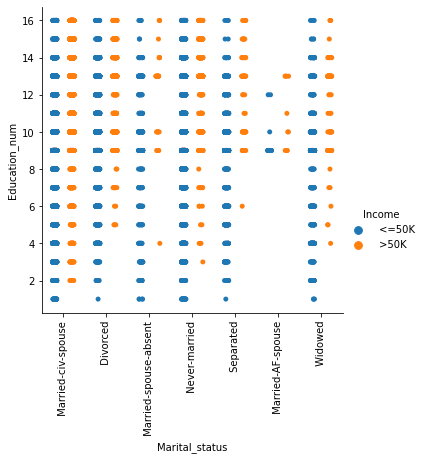

In [31]:
# For checking MaritalStatus and Education_num:-
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", data=data, split=True)
plt.xticks(rotation=90)

In this, the plot is showing people who are married but spouse is not present and has high education number.

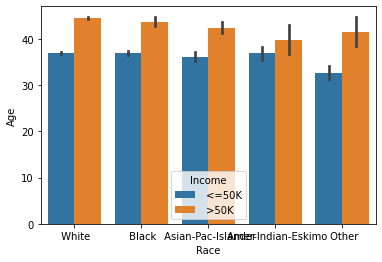

In [32]:
# For plotting using barplot for age and Race columns:
sns.barplot(x="Race",y="Age",hue="Income",data=data)
plt.show()

Here, it is seen that White people are getting more incomes as compared to other.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

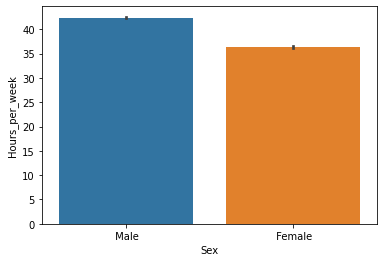

In [33]:
# For plotting Hours_per_week with Age:-
sns.barplot(data['Sex'],data['Hours_per_week'])

Here, it is seen that Males are working more as compared to Females.

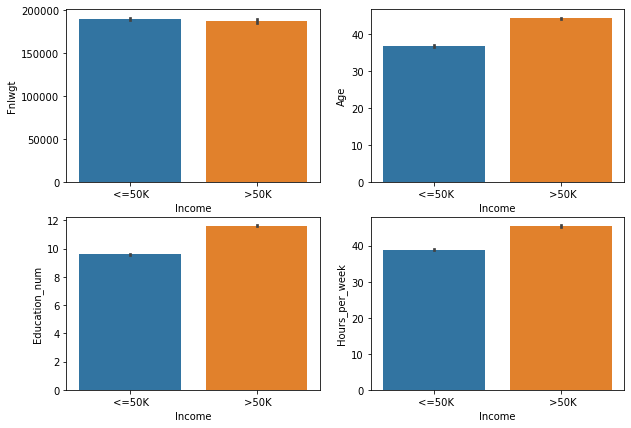

In [34]:
fig,axes=plt.subplots(2,2,figsize=(10,7))

# For Checking income with Fnlwgt:
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=data)

# For Checking income with Capital_gain:
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=data)

# For Checking income with Capital_loss:
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=data)

# For Checking income with Hours_per_week:
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=data)
plt.show()

In this, With age, the chances of getting >50k are more as u will also gain experience by that time.
Higher the Education_num, the higher are your chances of getting >50k.
More you work , more income you get, more hours per week you work, more are the chances of getting income > 50k.

# MultiVariate Analysis:-

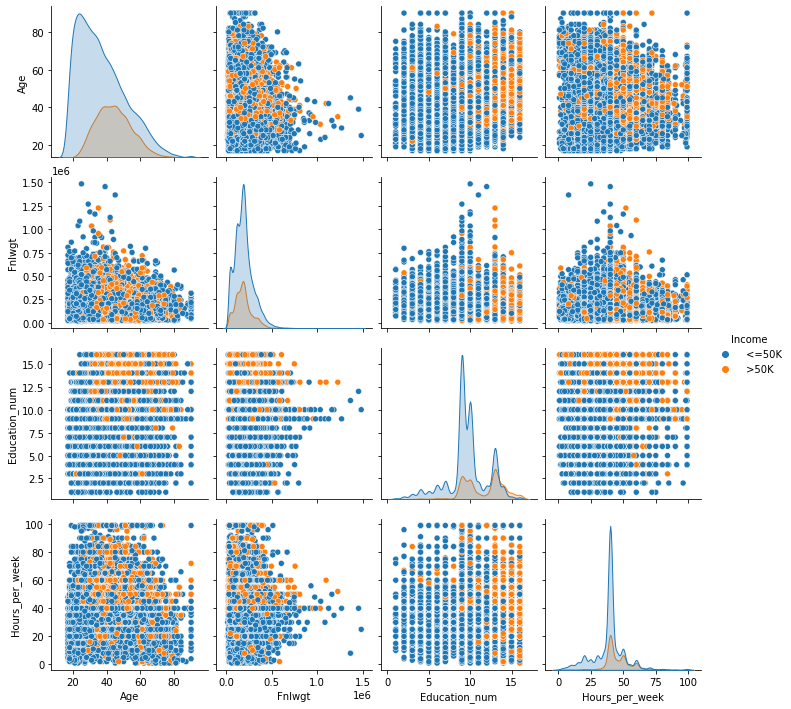

In [35]:
# For checking the correlation among all columns:
sns.pairplot(data,hue="Income")

In [36]:
# For checking correlation using data.corr():-
corr=data.corr()

In [37]:
corr

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


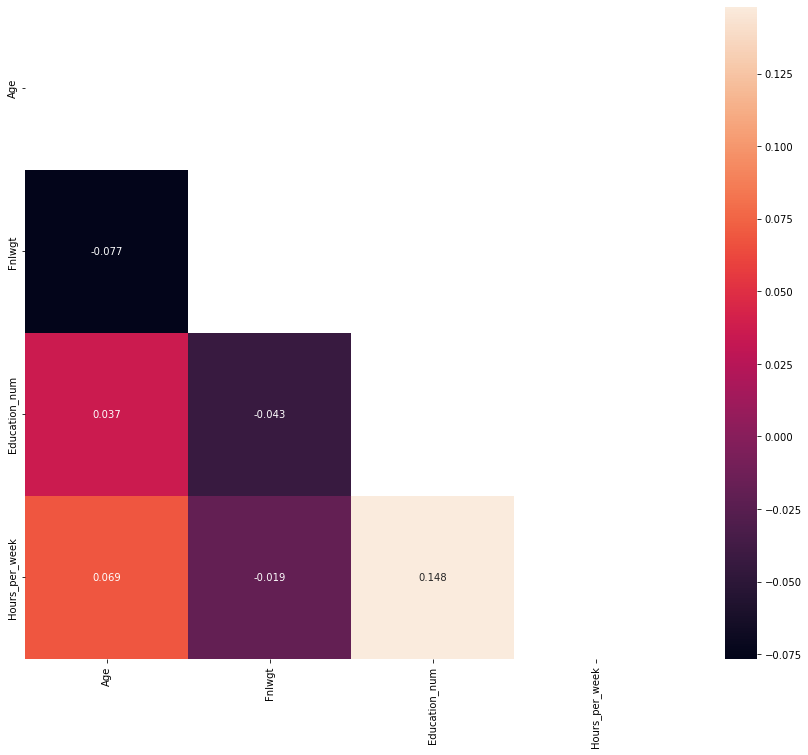

In [38]:
# For visualising correlation using heatmap method for clarity:-
tri=np.triu(data.corr())
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

Detection of Outliers:-

<AxesSubplot:>

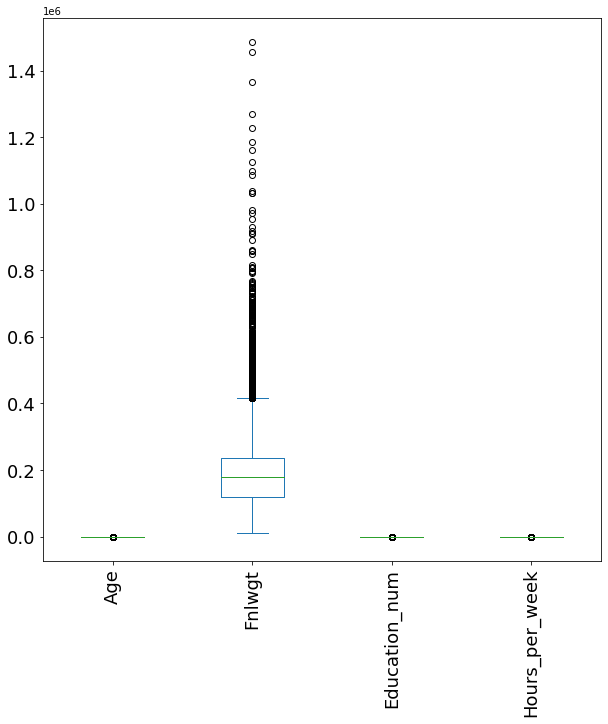

In [39]:
# For checking presence of outliers in whole dataset using boxplot method:-
data.plot(kind="box",fontsize=18,figsize=(10,10),rot=90)

Outliers are present in Numerical columns

# Removal of Outliers:-

In [40]:
# for defining outlier columns to a particular variable:-
outliers=data[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [41]:
# For importing required libraries for removal of outliers:-
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data1=data[(z<3).all(axis=1)]
data1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [42]:
# For checking whether the outliers ahs been removed or not
data1.shape

(31461, 13)

Here, in the dataset there are 31461 Rows and 13 Columns, whereas earlier dataset is having 32560 Rows and 13 columns.

In [43]:
# For checking the dataloss percentage:-
loss=(((data.shape[0]-data1.shape[0])/data.shape[0])*100)
loss

3.3753071253071254

#  Checking Skewness levels:-

In [44]:
# For checking the skewness in new dataset:-
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\2028546595.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Here, as per the limit of skewness only Fnlwgt is having skewness.

In [45]:
# For removing skewness using yeo-johnson method:-

# For importing required libraries:-
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
'''
parameters:
method="box_cox or "yeo-johnson
'''

'\nparameters:\nmethod="box_cox or "yeo-johnson\n'

In [46]:
# For assigning value F to column Fnlwgt:
F=["Fnlwgt"]

In [47]:
# For removing the skewness levels:-
data1[F]=scaler.fit_transform(data1[F].values)

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\1278562053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[F]=scaler.fit_transform(data1[F].values)


In [48]:
# For checking the skewness again:-
data1[F].skew()

Fnlwgt   -0.034507
dtype: float64

In this, the skewness levels has been removed.

# Label Encoding:-

In [49]:
# For dividing the data into categorical/ numerical:
Category1=[]
Integer1=[]
for i in data1.dtypes.index:
    if data1.dtypes[i]=="object":
        Category1.append(i)
    else:
        Integer1.append(i)
print(Category1)
print(Integer1)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


In [50]:
# For importing required libraries:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[Category1]=data1[Category1].apply(le.fit_transform)

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_12980\1720203064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[Category1]=data1[Category1].apply(le.fit_transform)


In [51]:
# For checking the converted data:-
data1[Category1].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,10,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


Here, the categorical columns has been converted to Numerical columns for proceeding ahead.

In [52]:
# For checking the correlation in the new dataset:-
corr=data1.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,0.000905,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007444,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.002382,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.031709,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.102128,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.024574,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,0.000905,0.007444,0.002382,-0.031709,0.102128,0.024574,1.000000,-0.046743,0.000417,0.051064,-0.000541,-0.002055,0.051945
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.046743,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,0.000417,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.051064,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Workclass'),
  Text(0, 2.5, 'Fnlwgt'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Education_num'),
  Text(0, 5.5, 'Marital_status'),
  Text(0, 6.5, 'Occupation'),
  Text(0, 7.5, 'Relationship'),
  Text(0, 8.5, 'Race'),
  Text(0, 9.5, 'Sex'),
  Text(0, 10.5, 'Hours_per_week'),
  Text(0, 11.5, 'Native_country'),
  Text(0, 12.5, 'Income')])

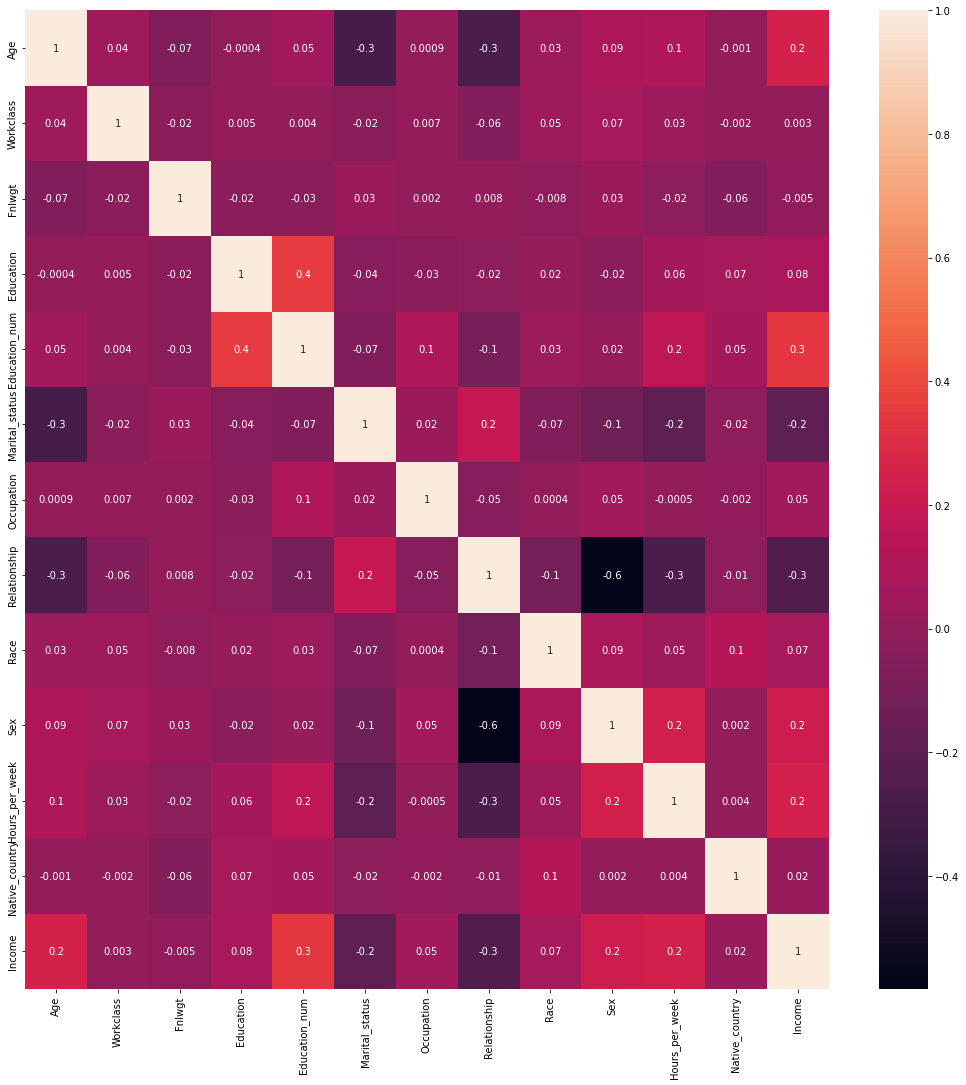

In [53]:
# For visualising the correlation using heatmap method:-
plt.figure(figsize=(18,18))
sns.heatmap(data1.corr(),fmt='.1g',annot=True)
plt.yticks(rotation=90)

Here,Relationship and Marital_status has negative correlation with target column &
Age and education_num column has positive correlations.

# SCALING TECHNIQUES:-

In [54]:
# For seperating x and y for training and testing purposes:-
x=data1.drop("Income",axis=1)
y=data1["Income"]

In [55]:
# For Scaling the data using standard scaler method:-
# For importing required Libraries:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [56]:
# For checking the Feature data:-
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.114171,-0.348344,1.154324,-0.403597,-0.785223,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.427192,0.245782,-0.459657,-1.733114,-0.325029,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.607320,-2.427783,-1.266647,-0.403597,-0.325029,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.487719,-0.348344,1.154324,-0.403597,0.825456,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.048962,0.542845,1.557819,-0.403597,-0.785223,2.203019,0.391304,-1.415226,-0.008364,0.254062


# Data Balancing:-

In [57]:
# For balancing the Target variable y using oversampling method:-
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [59]:
# For checking y value count after sampling:-
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

In this, as seen above the data has been balanced properly using SMOTE method.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

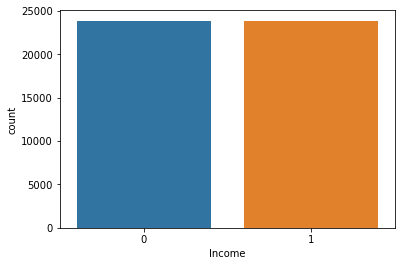

In [60]:
# For checking visualisation of y column:-
sns.countplot(y)

# For Best Random State:-

In [61]:
# For finding best random state and accuracy for models:-

# For importing required libraries:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [66]:
Max_acc=0
Max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    Model=RandomForestClassifier()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best accuracy score: ",Max_acc,"on Random_state: ",Max_rs)

Best accuracy score:  0.889913641318018 on Random_state:  115


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=115)

# Classification Model Building:-

In [69]:
# For importing required libraries:-
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [74]:
# For checking accuracy score with KNeighborsClassifier:-
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("R2 Score: ", accuracy_score(y_test,pred_knn))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

R2 Score:  0.8463989268047287
Confusion Matrix:  [[4517 1437]
 [ 395 5578]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5954
           1       0.80      0.93      0.86      5973

    accuracy                           0.85     11927
   macro avg       0.86      0.85      0.85     11927
weighted avg       0.86      0.85      0.85     11927



Here, it is giving Accuracy Score of 84.6%

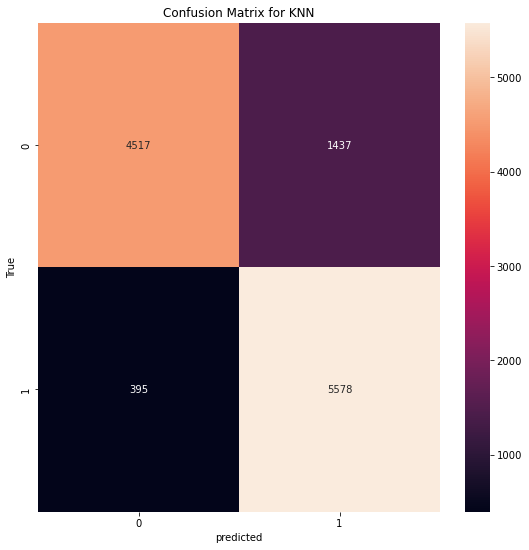

In [75]:
# For checking Confusion Matrix using heatmap method:-
CM=confusion_matrix(y_test, pred_knn)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

In [76]:
# For checking accuracy score with another method GradientBoostingClassifier:
Gbc=GradientBoostingClassifier()
Gbc.fit(x_train,y_train)
pred_Gbc=Gbc.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_Gbc))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_Gbc))
print(classification_report(y_test,pred_Gbc))

R2 score:  0.856208602330846
Confusion Matrix:  [[4858 1096]
 [ 619 5354]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5954
           1       0.83      0.90      0.86      5973

    accuracy                           0.86     11927
   macro avg       0.86      0.86      0.86     11927
weighted avg       0.86      0.86      0.86     11927



Here, it is giving accueracy of 85.6%

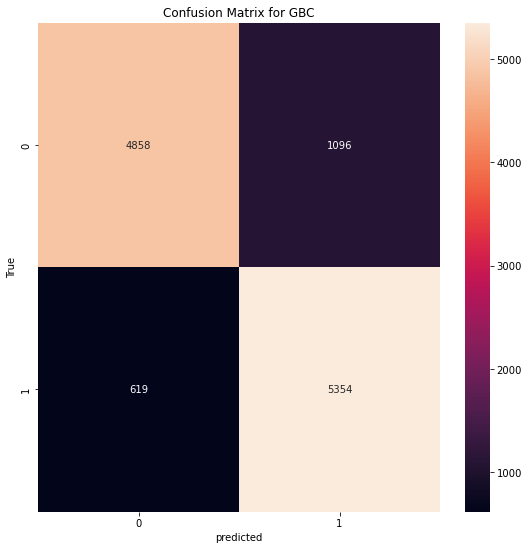

In [77]:
# For checking Confusion Matrix using heatmap method:-
CM1=confusion_matrix(y_test, pred_Gbc)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM1,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for GBC")
plt.show()

In [78]:
# For checking accuracy score with another method SupportVectorClassifier:
sv=SVC()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_sv))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

R2 score:  0.8221681898214136
Confusion Matrix:  [[4457 1497]
 [ 624 5349]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5954
           1       0.78      0.90      0.83      5973

    accuracy                           0.82     11927
   macro avg       0.83      0.82      0.82     11927
weighted avg       0.83      0.82      0.82     11927



Here, the accuracy score is coming 82%

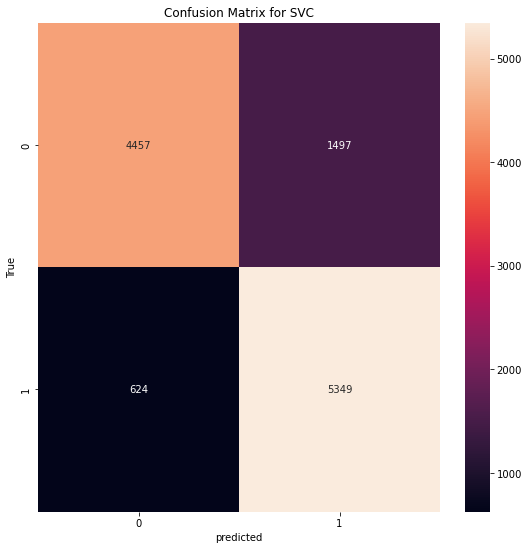

In [79]:
# For checking Confusion Matrix using heatmap method:-
CM2=confusion_matrix(y_test, pred_sv)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM2,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVC")
plt.show()

In [80]:
# For checking accuracy score with another method Logestic Regression which supports Binary Classifcation:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_lr))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

R2 score:  0.7581118470696738
Confusion Matrix:  [[4385 1569]
 [1316 4657]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5954
           1       0.75      0.78      0.76      5973

    accuracy                           0.76     11927
   macro avg       0.76      0.76      0.76     11927
weighted avg       0.76      0.76      0.76     11927



Here, it is giving accuracy score of 76%.

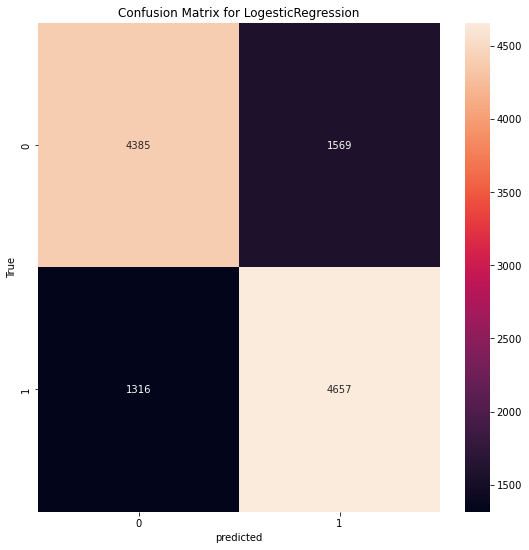

In [81]:
# For checking Confusion Matrix using heatmap method:-
CM3=confusion_matrix(y_test, pred_lr)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM3,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LogesticRegression")
plt.show()

In [82]:
# For checking accuracy score with another method DecisionTreeClassifier:-
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_DTC))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_DTC))
print(classification_report(y_test,pred_DTC))

R2 score:  0.8324809256309215
Confusion Matrix:  [[4956  998]
 [1000 4973]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5954
           1       0.83      0.83      0.83      5973

    accuracy                           0.83     11927
   macro avg       0.83      0.83      0.83     11927
weighted avg       0.83      0.83      0.83     11927



.Here, it is giving accuracy score of 83% which is lower than Gradient Boost

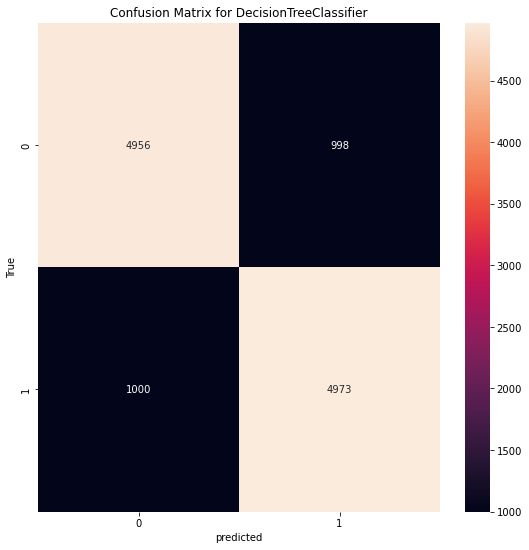

In [83]:
# For checking Confusion Matrix using heatmap method:-
CM4=confusion_matrix(y_test, pred_DTC)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM4,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for DecisionTreeClassifier")
plt.show()

In [70]:
# For checking accuracy score with another Classifcation algorithm: RandomForestClassifier:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_rfc))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

R2 score:  0.8917581956904502
Confusion Matrix:  [[5197  757]
 [ 534 5439]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5954
           1       0.88      0.91      0.89      5973

    accuracy                           0.89     11927
   macro avg       0.89      0.89      0.89     11927
weighted avg       0.89      0.89      0.89     11927



Here, RandomForest is giving highest accuarcy as of now of 89%.

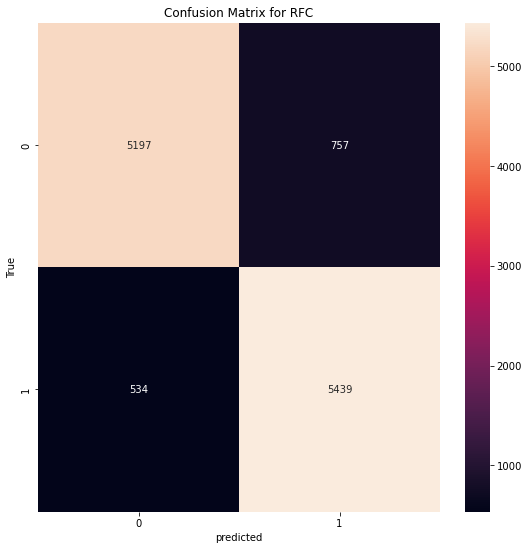

In [71]:
# For checking Confusion Matrix using heatmap method:-
CM5=confusion_matrix(y_test, pred_rfc)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM5,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for RFC")
plt.show()

# CROSS VALIDATION PHASE:-

In [84]:
# For checking CV score before selecting model for Hyperparameter Tuning:-

#  For importing required libraries
from sklearn.model_selection import cross_val_score

In [85]:
#  For printing Cv score of knn:-
print(cross_val_score(knn,x,y,cv=5).mean())

0.84932751152562


In [86]:
# For printing Cv score of GBC:-
print(cross_val_score(Gbc,x,y,cv=5).mean())

0.8491604666781238


In [88]:
# For printing Cv score of SVC:-
print(cross_val_score(sv,x,y,cv=5).mean())

0.8214691985263393


In [93]:
# For printing CV Score of LogesticRegression:-
print(cross_val_score(lr,x,y,cv=5).mean())

0.7489206188447123


In [94]:
# For printing CV Score of DecisionTree:-
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8293734696736571


In [95]:
# For printing CV Score of RandomForest:-
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8844395897892253


# So, after above findings RandomForestClassifier is the best and Final model.

# HYPER PARAMETER TUNING PHASE:-

In [136]:
# For importing required libraries:-
from sklearn.model_selection import GridSearchCV

In [140]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["sqrt"]}

In [141]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [142]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300, 400]})

In [143]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [144]:
FinalModel=RandomForestClassifier(criterion= "gini" ,max_depth=25  ,max_features="sqrt"  ,n_estimators=300 )
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

89.05005449819737


# ROC/AUC CURVE:-

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depreca

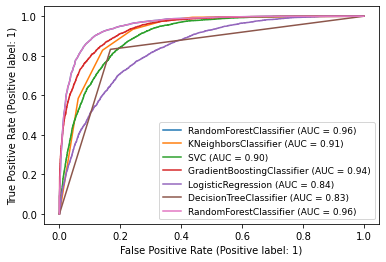

In [145]:
# For plotting all the models :-

# For importing required libraries:-
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
dis=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)
plot_roc_curve(sv,x_test,y_test, ax=dis.ax_)
plot_roc_curve(Gbc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(lr,x_test,y_test, ax=dis.ax_)
plot_roc_curve(DTC,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rfc,x_test,y_test, ax=dis.ax_)

plt.legend(prop={"size":9}, loc="lower right")
plt.show()

# Saving the Model:-

In [146]:
# For importing required libraries:-
import pickle
Name='CensusIncomePred'
pickle.dump(rfc,open(Name,'wb'))

Here, the model is saved.

# Loading the Model:-

In [147]:
# loading the saved model:-
LoadModel=pickle.load(open('CensusIncomePred','rb'))
Result=LoadModel.predict(x_test)
print(Result)

[1 1 1 ... 1 1 0]


In [148]:
pd.DataFrame([LoadModel.predict(x_test)[:],y_test[:]],index=["predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926
predicted,1,1,1,1,1,0,0,1,0,1,...,1,1,0,0,1,0,1,1,1,0
Actual,0,1,1,1,1,0,0,1,0,1,...,1,1,0,0,1,0,1,1,1,0


Thanks